    No   NIM    Nama  Total_Hadir  Persentase_Kehadiran Status
0    2  5022    Nina           13             92.857143  Aktif
1    3  2419    Rika           12             85.714286  Aktif
2    4  5569    Joko           13             92.857143  Aktif
3    5  8385    Gita            9             64.285714  Pasif
4    6  4995    Nana           13             92.857143  Aktif
5    7  8613  Lukman           10             71.428571  Pasif
6    8  7209    Dewi           11             78.571429  Aktif
7    9  6511  Hendra           12             85.714286  Aktif
8   10  1470    Tono           13             92.857143  Aktif
9   11  9098    Andi           14            100.000000  Aktif
10  12  6325     Eko            9             64.285714  Pasif
11  13  3979   Wawan            8             57.142857  Pasif
12  14  8988    Bima           14            100.000000  Aktif
13  15  4475     Lia           14            100.000000  Aktif
14  16  6813    Dodi           14            100.000000

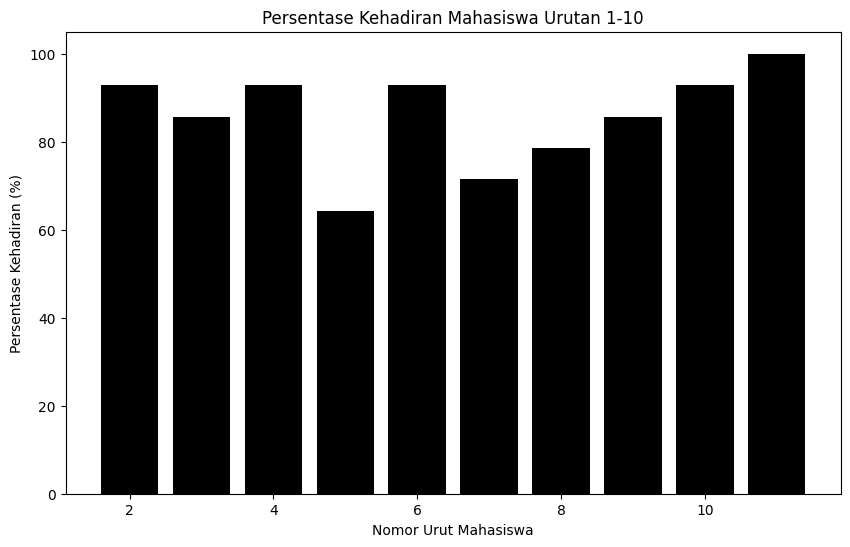

Masukkan NIM (4 angka):  6325



Nomor urut di file Excel: 12
Data Mahasiswa:
                             10
No                           12
NO                          NaN
NIM                        6325
Nama                        Eko
M1                            1
M2                            1
M3                            1
M4                            1
M5                            1
M6                            0
M7                            0
M8                            1
M9                            0
M10                           0
M11                           1
M12                           1
M13                           1
M14                           0
Total_Hadir                   9
Status                    Pasif
Persentase_Kehadiran  64.285714


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca file CSV yang hanya berisi NIM, Nama, M1-M14 (belum ada status)
df = pd.read_csv('data_kehadiran.csv', sep=';')

# Antisipasi jika kolom 'No' sudah ada dari hasil running sebelumnya
if 'No' in df.columns:
    df = df.drop('No', axis=1)

# List otomatis nama kolom kehadiran (M1 sampai M14)
kolom_kehadiran = [f"M{i}" for i in range(1, 15)]

# Hitung jumlah kehadiran (jumlah 1 di M1-M14) untuk tiap mahasiswa
df['Total_Hadir'] = df[kolom_kehadiran].sum(axis=1)

# Hitung persentase kehadiran
df['Persentase_Kehadiran'] = (df['Total_Hadir'] / 14) * 100

# Tentukan status otomatis:
# - Aktif jika hadir minimal 11x
# - Pasif jika hadir kurang dari 11x
df['Status'] = df['Total_Hadir'].apply(lambda x: 'Aktif' if x >= 11 else 'Pasif')

# Tambahkan kolom "No" agar nomor urut data sama seperti di Excel (baris 2 dst, karena baris 1 header)
df.insert(0, 'No', range(2, 2 + len(df)))

# Tampilkan ringkasan hasil ke terminal
print(df[['No', 'NIM', 'Nama', 'Total_Hadir', 'Persentase_Kehadiran', 'Status']])

# Simpan hasil (yang sudah ditambah status & total hadir) ke file CSV yang sama (overwrite file lama)
df.to_csv('data_kehadiran.csv', sep=';', index=False)
print("\nFile dengan status dan persentase kehadiran sudah diperbarui: data_kehadiran.csv")

# Grafik untuk mahasiswa urutan 1-10 berdasarkan Persentase Kehadiran
top_10 = df.head(10)  # Ambil 10 mahasiswa pertama
plt.figure(figsize=(10, 6))

# Plot grafik bar persentase kehadiran mahasiswa 1-10
plt.bar(top_10['No'], top_10['Persentase_Kehadiran'], color='black')

# Menambahkan label dan judul
plt.xlabel('Nomor Urut Mahasiswa')
plt.ylabel('Persentase Kehadiran (%)')
plt.title('Persentase Kehadiran Mahasiswa Urutan 1-10')

# Tampilkan grafik
plt.show()

# Fitur pencarian data berdasarkan NIM dari input user
nim_input = input("Masukkan NIM (4 angka): ")
nim_int = int(nim_input)
hasil = df[df['NIM'] == nim_int]

# Jika ditemukan, tampilkan detail beserta nomor urut sesuai file Excel
if not hasil.empty:
    idx = hasil.index[0]
    print(f"\nNomor urut di file Excel: {idx + 2}")  # +2 agar sesuai baris data di Excel (baris 1 header)
    print("Data Mahasiswa:")
    print(hasil.T)
else:
    print("NIM tidak ditemukan.")
